In [5]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
from data_import import ag_merged
import pandas as pd
import numpy as np
ag_merged

1999-03-10 00:00:00
           Date      Volume  % Change  TMAX  TMIN  TOTALPRCP binned
0    1999-03-10  11700414.0 -0.124666    42    27       0.00    Low
1    1999-03-11  21670048.0 -0.247858    40    26       0.00    Low
2    1999-03-12  19553768.0 -2.080007    39    24       0.00    Low
3    1999-03-15  14245348.0  2.108601    41    32       4.37   High
4    1999-03-16  10971066.0  0.419432    50    32       0.00    Low
...         ...         ...       ...   ...   ...        ...    ...
4696 2017-11-06   9714451.5  0.195827    66    46       0.01    Low
4697 2017-11-07  10337675.5 -0.068213    49    40       0.70    Low
4698 2017-11-08   9011700.7  0.188292    49    39       0.00    Low
4699 2017-11-09  16871876.3  0.149131    55    39       0.00    Low
4700 2017-11-10   9777757.4  0.053403    51    25       0.01    Low

[4701 rows x 7 columns]


,Date,Volume,% Change,TMAX,TMIN,TOTALPRCP,binned
0,2007-01-05,27800,0.373134,62,53,0.03,Low
1,2007-01-08,143500,-0.082679,56,38,1.25,Med
2,2007-01-09,136700,-0.583333,44,34,0.00,Low
3,2007-01-10,76600,0.125523,36,29,0.00,Low
4,2007-01-11,160000,0.830220,38,26,0.00,Low
...,...,...,...,...,...,...,...
2728,2017-11-06,855687,0.413223,66,46,0.01,Low
2729,2017-11-07,404127,0.257732,49,40,0.70,Low
2730,2017-11-08,327948,-0.257467,49,39,0.00,Low
2731,2017-11-09,719723,-0.206505,55,39,0.00,Low


In [6]:
cols = list(ag_merged.select_dtypes(include=np.number).columns)

for col in cols:
    col_zscore = col + ' Zscore'
    ag_merged[col_zscore] = (ag_merged[col] - ag_merged[col].mean())/ag_merged[col].std(ddof=0)
 

In [7]:
ag_merged

,Date,Volume,% Change,TMAX,TMIN,TOTALPRCP,binned,Volume Zscore,% Change Zscore,TMAX Zscore,TMIN Zscore,TOTALPRCP Zscore
0,2007-01-05,27800,0.373134,62,53,0.03,Low,-1.031159,0.432864,-0.090421,0.222995,-0.226867
1,2007-01-08,143500,-0.082679,56,38,1.25,Med,-0.922039,-0.044500,-0.419767,-0.678374,1.094208
2,2007-01-09,136700,-0.583333,44,34,0.00,Low,-0.928452,-0.568826,-1.078460,-0.918739,-0.259353
3,2007-01-10,76600,0.125523,36,29,0.00,Low,-0.985134,0.173546,-1.517589,-1.219196,-0.259353
4,2007-01-11,160000,0.830220,38,26,0.00,Low,-0.906477,0.911561,-1.407807,-1.399470,-0.259353
...,...,...,...,...,...,...,...,...,...,...,...,...
2728,2017-11-06,855687,0.413223,66,46,0.01,Low,-0.250355,0.474849,0.129144,-0.197644,-0.248524
2729,2017-11-07,404127,0.257732,49,40,0.70,Low,-0.676234,0.312006,-0.804005,-0.558192,0.498641
2730,2017-11-08,327948,-0.257467,49,39,0.00,Low,-0.748081,-0.227552,-0.804005,-0.618283,-0.259353
2731,2017-11-09,719723,-0.206505,55,39,0.00,Low,-0.378587,-0.174181,-0.474658,-0.618283,-0.259353


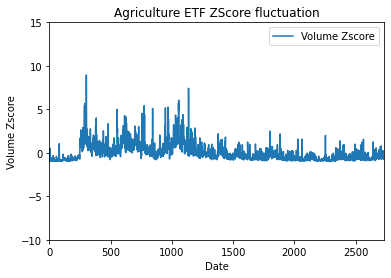

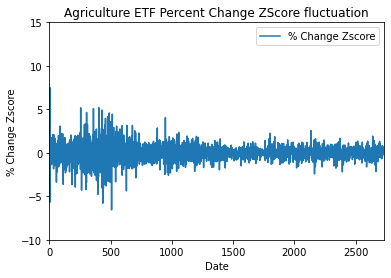

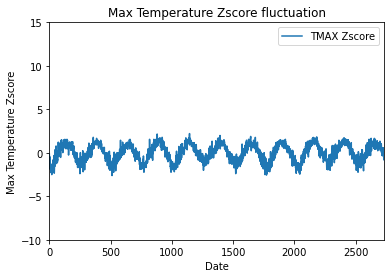

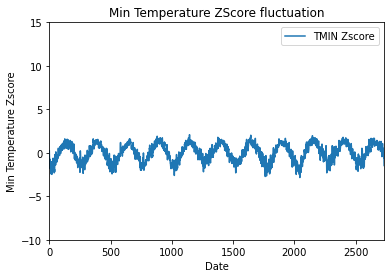

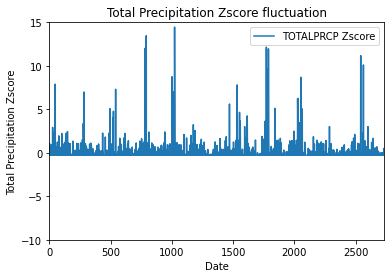

In [8]:
ag_merged.plot(y = "Volume Zscore")
plt.xlabel("Date")
plt.ylabel("Volume Zscore")
plt.title("Agriculture ETF ZScore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()

ag_merged.plot(y = "% Change Zscore")
plt.xlabel("Date")
plt.ylabel("% Change Zscore")
plt.title("Agriculture ETF Percent Change ZScore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()

ag_merged.plot(y = "TMAX Zscore")
plt.xlabel("Date")
plt.ylabel("Max Temperature Zscore")
plt.title("Max Temperature Zscore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()

ag_merged.plot(y = "TMIN Zscore")
plt.xlabel("Date")
plt.ylabel("Min Temperature Zscore")
plt.title("Min Temperature ZScore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()

ag_merged.plot(y = "TOTALPRCP Zscore")
plt.xlabel("Date")
plt.ylabel("Total Precipitation Zscore")
plt.title("Total Precipitation Zscore fluctuation")
plt.axis([ag_merged.index.min(), ag_merged.index.max(), -10, 15])
plt.show()


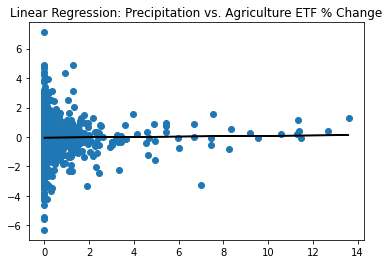

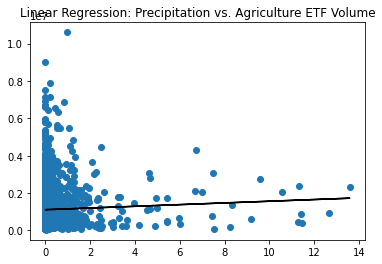

In [9]:
stock_volume = ag_merged['Volume'].values.reshape(-1,1)
stock_percent = ag_merged['% Change'].values.reshape(-1,1)
weather_precip = ag_merged['TOTALPRCP'].values.reshape(-1,1)
weather_max = ag_merged['TMAX'].values.reshape(-1,1)
weather_min = ag_merged['TMIN'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(weather_precip, stock_percent)  
Y_pred = linear_regressor.predict(weather_precip)
plt.scatter(weather_precip, stock_percent)
plt.plot(weather_precip, Y_pred, color='black')
plt.title("Linear Regression: Precipitation vs. Agriculture ETF % Change")
plt.show()
  
linear_regressor.fit(weather_precip, stock_volume)  
Y_pred = linear_regressor.predict(weather_precip)
plt.scatter(weather_precip, stock_volume)
plt.plot(weather_precip, Y_pred, color='black')
plt.title("Linear Regression: Precipitation vs. Agriculture ETF Volume")
plt.show()

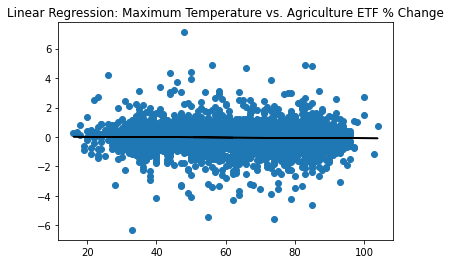

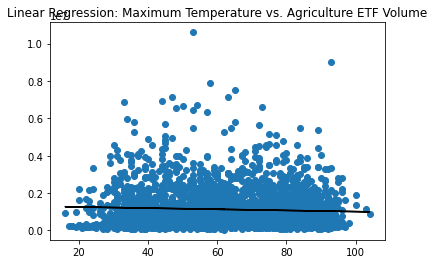

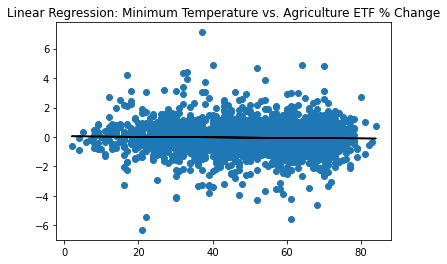

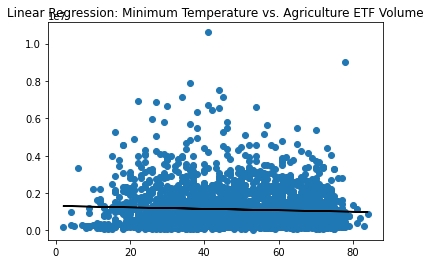

In [10]:
linear_regressor.fit(weather_max, stock_percent)  
Y_pred = linear_regressor.predict(weather_max) 
plt.scatter(weather_max, stock_percent)
plt.plot(weather_max, Y_pred, color='black')
plt.title("Linear Regression: Maximum Temperature vs. Agriculture ETF % Change")
plt.show()

linear_regressor.fit(weather_max, stock_volume)  
Y_pred = linear_regressor.predict(weather_max) 
plt.scatter(weather_max, stock_volume)
plt.plot(weather_max, Y_pred, color='black')
plt.title("Linear Regression: Maximum Temperature vs. Agriculture ETF Volume")
plt.show()

linear_regressor.fit(weather_min, stock_percent)  
Y_pred = linear_regressor.predict(weather_min) 
plt.scatter(weather_min, stock_percent)
plt.plot(weather_min, Y_pred, color='black')
plt.title("Linear Regression: Minimum Temperature vs. Agriculture ETF % Change")
plt.show()

linear_regressor.fit(weather_min, stock_volume)  
Y_pred = linear_regressor.predict(weather_min) 
plt.scatter(weather_min, stock_volume)
plt.plot(weather_min, Y_pred, color='black')
plt.title("Linear Regression: Minimum Temperature vs. Agriculture ETF Volume")
plt.show()